Task-1:-  Interest Point Detection, Feature Matching and Contour Detection

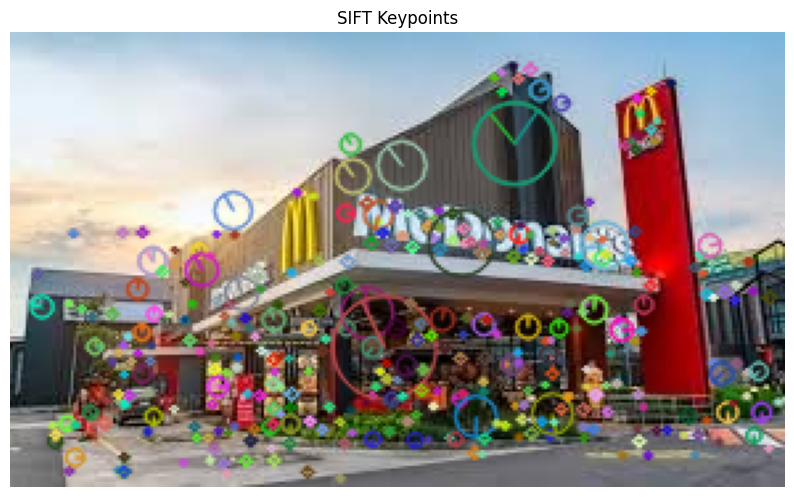

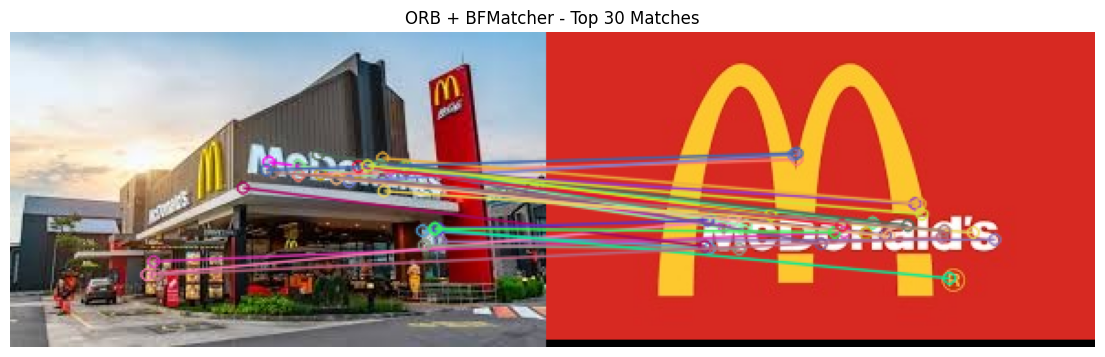

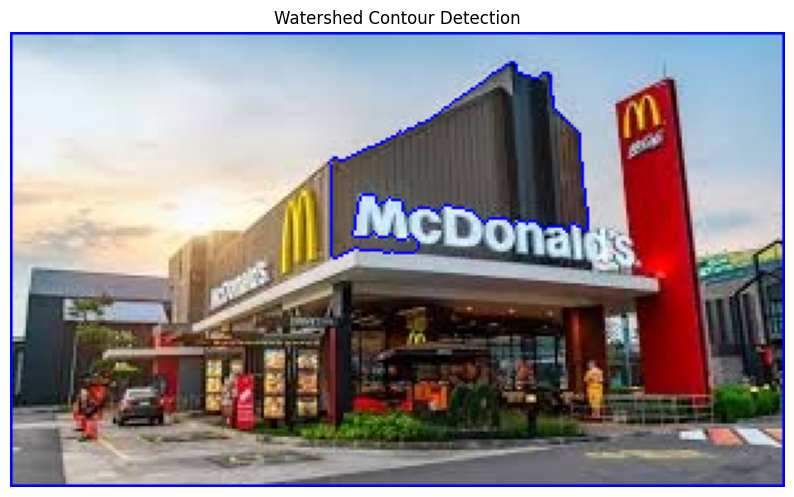

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img1 = cv2.imread('/content/box.png')
img2 = cv2.imread('/content/box_in_scene.png')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


sift = cv2.SIFT_create()
keypoints_1, descriptors_1 = sift.detectAndCompute(gray1, None)

sift_img = cv2.drawKeypoints(img1, keypoints_1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10, 6))
plt.title('SIFT Keypoints')
plt.imshow(cv2.cvtColor(sift_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)


bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

matched_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:30], None, flags=2)
plt.figure(figsize=(14, 6))
plt.title('ORB + BFMatcher - Top 30 Matches')
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

sure_bg = cv2.dilate(opening, kernel, iterations=3)

dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)


ret, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1
markers[unknown == 255] = 0


img_watershed = img1.copy()
markers = cv2.watershed(img_watershed, markers)
img_watershed[markers == -1] = [255, 0, 0]

plt.figure(figsize=(10, 6))
plt.title("Watershed Contour Detection")
plt.imshow(cv2.cvtColor(img_watershed, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
